# Canada Open Data #

## Набор данных ##

url: http://www.data.gc.ca/

Набор данных: [Annual Projections of New Immigrants Seeking Jobs by Occupation](http://www.edsc-esdc.gc.ca/ouvert-open/labour-travail/immigration_2015_2024.csv) 
(Ежегодные прогнозы новых иммигрантов, ищущих работу по профессии)

Данные уже загружены и находятся в ./data/immigration_2015_2024.csv

Загрузим данные и посмотрим некоторые из них. Данные в кодировке cp1250.

## Структура данных ##

* Code - COPS код группы профессий
* Occupation_Name - английское название
* Nom_de_la_profession - французское название
* 2014-2024 - прогноз по годам

## "Познакомимся" с данными ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./data/immigration_2015_2024.csv', index_col=1, encoding='cp1250')
del data['Code']
del data['Nom_de_la_profession']

Посмотрим первые записи

In [4]:
data.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
All Occupations,120400,116600,118200,119700,121300,122900,124500,126000,127600,128900,130300
Management Occupations,9200,8900,8900,9000,9000,9100,9100,9200,9300,9300,9400
Occupations usually require university education.,24100,23300,23500,23800,24100,24400,24700,25000,25300,25500,25800
Occupations usually require college or vocational education or apprenticeship training.,32800,31900,32500,33000,33600,34100,34700,35200,35700,36200,36700
Occupations usually require secondary school and/or occupation-specific training.,35800,34500,34900,35300,35700,36100,36500,36900,37300,37600,37900


Посмотрим последнии записи

In [5]:
data.tail()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Labourers in mineral and metal processing & Labourers in metal fabrication,100,100,100,100,100,100,100,100,100,100,100
Labourers in chemical products processing and utilities & Labourers in rubber and plastic products manufacturing,200,100,100,100,100,100,100,100,100,100,100
"Labourers in wood, pulp and paper processing",0,0,0,0,0,0,0,0,0,0,0
"Labourers in textile processing & Other labourers in processing, manufacturing and utilities",1100,1100,1000,1000,1000,1000,1000,1000,1000,1000,1000
"Labourers in food, beverage and related products processing & Labourers in fish and seafood processing",1100,1000,1000,1000,1000,1000,1000,1000,1000,1000,900


Размерность данных

In [6]:
data.shape

(308, 11)

## Проверим есть ли отсутствующие значения в данных ##

Проверим на NaN

In [7]:
data.isnull().any()

2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool

Проверим есть ли строки, содержащие только нули

In [22]:
zero_rows = data[(data == 0).all(axis=1)]
zero_rows.shape[0]

20

20 пустых строк, удалим их из набора данных

In [26]:
data = data[(data != 0).any(axis=1)]

Посмотрим как в целом по всем профессиям меняется количество иммигрантов ищущих работу.

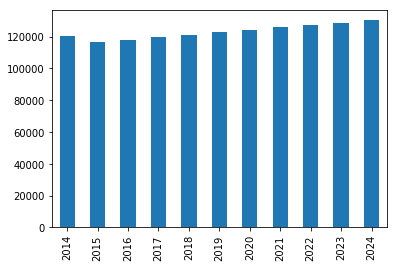

In [27]:
data.iloc[0].plot(kind='bar')

Найдем группу профессий с мин/макс количеством иммигрантов за текущий 2017 год

In [32]:
year = '2017'

In [33]:
ix_min = data[year].iloc[1:].idxmin()
ix_min

u'Managers in public protection services'

In [34]:
data[year][ix_min]

0

Не удивительно, что ноль. К группе "Managers in public protection services" относятся такие подгруппы профессий как:
    
    * Commissioned police officers
    * Fire chiefs and senior firefighting officers
    * Commissioned officers of the Canadian Forces
    
Т.е. то, что связано с безопасностью. Иммигрантов, как правило не берут на такие профессии. Давайте, посмотрим,
а вообще по всем годам есть положительные прогнозы для данной группы?

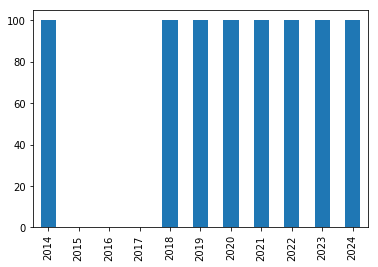

In [41]:
data.loc[ix_min].plot(kind='bar')

В 2014 году были и по прогнозам в будущем будут.

In [35]:
ix_max = data['2017'].iloc[1:].idxmax()
ix_max

u'Sales and service occupations'

In [36]:
data[year][ix_max]

37500